# Project 2
## least squares regression and nearest neighbor classifiers

### Members:
* Akhilesh Vyas
* Pooja Bhatia
* Asif Altaf 
* Abakar Bouba
* Mehdi Ali
* Seyithan Dag
* Mihail Luchian
* Muhammad Hassan Farooq
* Utkrist Adhikari
* Julian Tanke
* Omid Najaee Nezhad
* Hosam Alqaderi

### task 2.1 least squares regression for missing value prediction

Least squares polynomial fit with loss $E(w) = \big\vert\big\vert Xw -y \big\vert\big\vert^2$:

$$
w = \big( X^T X\big)^{-1} X^T y
$$

$$
X = \begin{bmatrix}
1 & x_1 & x_1^2 & \cdots  & x_1^d \\ 
 &  &  & \vdots  & \\ 
1 & x_n & x_n^2 & \cdots & x_n^d
\end{bmatrix}, \ \ \ \ y = \begin{bmatrix}
y_1 \\
\vdots \\ 
y_n\\ 
\end{bmatrix}
$$

For this task fit models for $d\in \{ 1, 5, 10\}$

d: 1    theta_MLE_unstable: [-209.32503027    1.61805916] 

d: 1    theta_MLE_Stable: [-209.32503027    1.61805916] 

height: 168.000000  predicted weight: 62.508908
height: 172.000000  predicted weight: 68.981145
height: 167.000000  predicted weight: 60.890849
------------------
d: 5    theta_MLE_unstable: [ -1.30479804e+08   3.79331954e+06  -4.40815298e+04   2.55955945e+02
  -7.42582670e-01   8.61160034e-04] 

d: 5    theta_MLE_Stable: [  1.45372183e+02   5.00647315e+03  -1.15279602e+02   9.94127434e-01
  -3.80603245e-03   5.45891060e-06] 

height: 168.000000  predicted weight: 58.664256
height: 172.000000  predicted weight: 69.566917
height: 167.000000  predicted weight: 56.015184
------------------
d: 10    theta_MLE_unstable: [  1.61318571e+07  -3.82794567e+05   2.97487101e+03  -7.90433303e+00
   4.09719587e-02  -6.01323493e-04   2.71326715e-06  -4.21290555e-09
   3.50082681e-11  -2.44267472e-13   4.61527761e-16] 

d: 10    theta_MLE_Stable: [  3.39741649e-19  -5.63814158e-12   4.

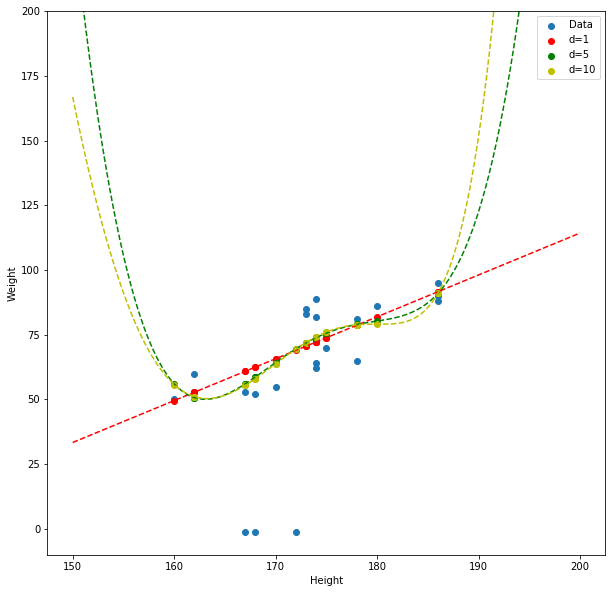

In [ ]:
%matplotlib inline
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import sys



def predict(X_design, theta):
    predictions = np.matmul(X_design,theta)
    return predictions

def leastSquaresUnstable(X_design, Y):
    X_T_X = np.matmul(X_design.T, X_design)
    inverse = np.linalg.inv(X_T_X)
    theta_MLE = np.matmul(np.matmul(inverse, X_design.T), Y)

    return theta_MLE

def leastSquaresStable(X_design, Y):
    theta_MLE = np.matmul(np.linalg.pinv(X_design), Y)

    return theta_MLE

def commputeDesignX(X,d):
    X_design = np.array([[x ** (i) for i in range(d + 1)] for x in X])

    return X_design


dataPath = 'whData.dat'
data = np.loadtxt(dataPath, dtype=np.object, comments='#', delimiter=None)
ws = data[:, 0].astype('int32')
hs = data[:, 1].astype('int32')
gs = data[:, 2]

wsAll = np.array(ws, dtype=float)
hsAll = np.array(hs, dtype=float)
gsAll = np.array(gs)

# Remove outliers
wIndex = ((ws > 0) * 1).nonzero()
wIndexOutliers = ((ws < 0) * 1).nonzero()

ws = wsAll[wIndex]
hs = hsAll[wIndex]
gs = gsAll[wIndex]

hsOut = hsAll[wIndexOutliers]

Ds = [1,5,10]
colors = ['r--','g--','y--']
colorsScatter = ['r', 'g', 'y']
xs = np.linspace(150, 200, 1000)
plt.figure(figsize=(10,10))
plt.scatter(hsAll, wsAll, label='Data')

for i,d in enumerate(Ds):
    X_design = commputeDesignX(X=hs, d=d)
    X_designAll = commputeDesignX(X=hsAll, d=d)
    theta_MLE_unstable = leastSquaresUnstable(X_design=X_design,Y=ws)
    theta_MLE_Stable = leastSquaresStable(X_design=X_design,Y=ws)
    print("d: %d    theta_MLE_unstable: %s \n" % (d, theta_MLE_unstable))
    print("d: %d    theta_MLE_Stable: %s \n" % (d,theta_MLE_Stable))
    # Predictions for outliers
    X_design_Out = commputeDesignX(hsOut,d=d)
    predsOutliers = predict(X_design=X_design_Out, theta=theta_MLE_Stable)
    for j,predO in enumerate(predsOutliers):
        print("height: %f  predicted weight: %f" % (hsOut[j], predsOutliers[j]))
    print('------------------')

    predictions = predict(X_design=X_designAll, theta=theta_MLE_Stable)
    X_design_xs = commputeDesignX(xs, d=d)
    ys = predict(X_design=X_design_xs, theta=theta_MLE_Stable)

    # Plot
    plt.xlabel('Height')
    plt.ylabel('Weight')
    label = 'd=' + str(d)
    plt.ylim([-10, 200])
    plt.scatter(hsAll, predictions, color=colorsScatter[i],label=label)
    plt.plot(xs, ys, colors[i])
    plt.legend()

plt.show()

### task 2.2: conditional expectation for missing value prediction

Fit a bi-variate Gaussian to the height and weight data in $x$ and $y$ to model the joint density $p(x,y)$ of heights and weights.

Given your fitted bi-variate Gaussian, use the idea of conditional expectation to predict the weight values for the outliers. That is, let $x_0$ denote the available height data of an outlier and compute 
$$
|\!E \big[ \ y \ \big| \ x_0 \ \big] =
\int y \ p(y | x_0 ) dy
$$

Do this either analytically as discussed in the lecture or numerically and report your results.

In [3]:
import numpy as np 
# Load data
dataPath = 'whData.dat'
data = np.loadtxt(dataPath, dtype=np.object, comments='#', delimiter=None)
ws = data[:,0]
hs = data[:,1]
gs = data[:,2]

ws = np.array(ws, dtype=float)
hs = np.array(hs, dtype=float)
gs = np.array(gs)

# Handle outliers
wIndex = ((ws > 0) * 1).nonzero()
wIndexOutliers = ((ws < 0) * 1).nonzero()


hsOut = hs[wIndexOutliers]
ws = ws[wIndex]
hs = hs[wIndex]
gs = gs[wIndex]


# Shape = (#variables,#values)
X = np.array([ws,hs],dtype=float)

# Compute parameters of bivariate Gaussian
meanWeight = np.mean(ws)
meanHeight = np.mean(hs)
sdWeight = np.sqrt(np.var(ws,ddof=1))
sdHeight = np.sqrt(np.var(hs,ddof=1))
cov_h_w = np.cov(X,bias=False)[0,1]
pearsonCor = cov_h_w/(sdHeight*sdWeight)


# Predict weights for outliers
print('-------Unbiased covariance and biased standard deiation-------')
for hOut in hsOut:
    predWeight = meanWeight + pearsonCor*(sdWeight/sdHeight)*(hOut-meanHeight)
    print("height of outlier: %f  predicted weight: %f" % (hOut, predWeight))


# Second Version: SDs are biased
meanWeight = np.mean(ws)
meanHeight = np.mean(hs)
sdWeight = np.std(ws)
sdHeight = np.mean(hs)
cov_h_w = np.cov(X, bias=True)[0, 1]
pearsonCor = cov_h_w / (sdHeight * sdWeight)

print()
print('------------------')
for hOut in hsOut:
    predWeight = meanWeight + pearsonCor*(sdWeight/sdHeight)*(hOut-meanHeight)
    print("height of outlier: %f  predicted weight: %f" % (hOut, predWeight))

-------Unbiased-------
height of outlier: 168.000000  predicted weight: 62.508908
height of outlier: 172.000000  predicted weight: 68.981145
height of outlier: 167.000000  predicted weight: 60.890849

------------------
height of outlier: 168.000000  predicted weight: 71.508119
height of outlier: 172.000000  predicted weight: 71.519384
height of outlier: 167.000000  predicted weight: 71.505303


### task 2.3: Baysian regression for missing value prediction

Use the method of Baysian regression to fit a 5.th degree polynomial
$$
y(x) = \sum_{j=0}^{5} w_j x^j
$$

to the height and weight data in $x$ and $y$. Assume a Gaussian prior
$$
p(w) \sim \mathcal{N} \big(w \ \big| \ \mu_0, \sigma_0^2 I \ \big)
$$

for the parameter vector $w$ where $\mu_0 = 0$ and $\sigma_0^2=3$. Plot your resulting model and compare it to the corresponding model ($d=5$) from task 2.1

theta_MLE_unstable: [ -1.30479804e+08   3.79331954e+06  -4.40815298e+04   2.55955945e+02
  -7.42582670e-01   8.61160034e-04] 

theta_MLE_Stable: [  1.45372183e+02   5.00647315e+03  -1.15279602e+02   9.94127434e-01
  -3.80603245e-03   5.45891060e-06] 

theta_MAP: [  1.40191443e-04   1.26025474e-02   5.16581410e-01  -9.04147996e-03
   5.27349399e-05  -1.02058518e-07] 

-----------Predictions based on Sigma^2= Variance of residuals-----------
height: 186.000000  predicted weight: 90.641851
height: 170.000000  predicted weight: 64.453283
height: 167.000000  predicted weight: 59.143994
height: 173.000000  predicted weight: 70.396605
height: 186.000000  predicted weight: 90.641851
height: 180.000000  predicted weight: 83.974650
height: 173.000000  predicted weight: 70.396605
height: 168.000000  predicted weight: 60.817209
height: 174.000000  predicted weight: 72.439782
height: 170.000000  predicted weight: 64.453283
height: 186.000000  predicted weight: 90.641851
height: 175.000000  predicte

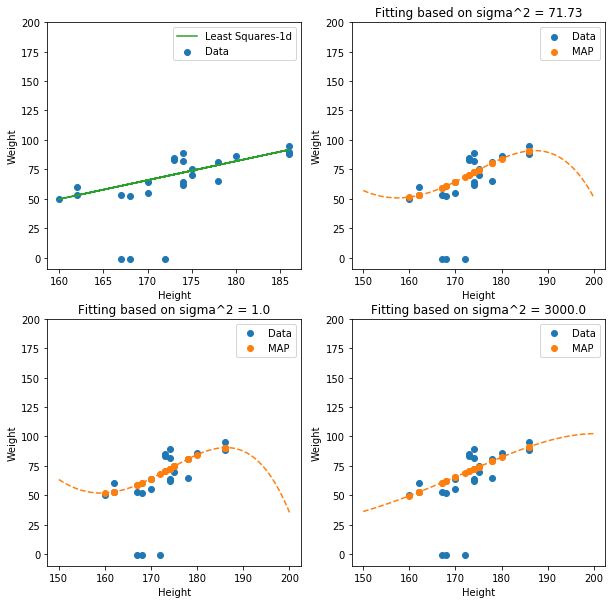

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys
def predict(X_design, theta):
    predictions = np.matmul(X_design,theta)
    return predictions

def bayesianRegression(X_design, Y, sigmaSquare, sigma_0_square):
    X_T_X = np.matmul(X_design.T,X_design)
    regulariser = sigmaSquare/sigma_0_square
    I_regularised = regulariser*np.identity(X_T_X.shape[0])
    inverse = np.linalg.inv(np.add(X_T_X,I_regularised))
    theta_MAP = np.matmul(np.matmul(inverse,X_design.T), Y)

    return theta_MAP

def leastSquaresUnstable(X_design, Y):
    X_T_X = np.matmul(X_design.T, X_design)
    inverse = np.linalg.inv(X_T_X)
    theta_MLE = np.matmul(np.matmul(inverse, X_design.T), Y)

    return theta_MLE

def leastSquaresStable(X_design, Y):
    theta_MLE = np.matmul(np.linalg.pinv(X_design), Y)

    return theta_MLE

def commputeDesignX(X,d):
    X_design = np.array([[x ** (i) for i in range(d + 1)] for x in X])

    return X_design

# Load data
dataPath = 'whData.dat'
data = np.loadtxt(dataPath, dtype=np.object, comments='#', delimiter=None)

ws = data[:, 0].astype('int32')
hs = data[:, 1].astype('int32')
gs = data[:, 2]

wsAll = np.array(ws, dtype=float)
hsAll = np.array(hs, dtype=float)
gsAll = np.array(gs)


# Remove outliers
wIndex = ((ws > 0) * 1).nonzero()

ws = wsAll[wIndex]
hs = hsAll[wIndex]
gs = gsAll[wIndex]

# Apply Bayessian regression
sigma_0_square = 3.
sigmaSquare = 1.

X_design_hsAll_d_5 = commputeDesignX(X=hsAll, d=5)
X_design = commputeDesignX(X=hs,d=5)
thetaMLE_Unstable = leastSquaresUnstable(X_design=X_design, Y=ws)
thetaMLE_Stable = leastSquaresStable(X_design=X_design, Y=ws)

# Select sigmaSquare
X_design_d_1 = commputeDesignX(X=hs,d=1)
theta_MLE_d_1 = leastSquaresStable(X_design=X_design_d_1,Y=ws)
predictions_d_1 = predict(X_design=X_design_d_1, theta=theta_MLE_d_1)

residuals = predictions_d_1 - ws
varianceResiduals = np.var(residuals)

sigmaSquare = varianceResiduals
SigmaSquare  = [varianceResiduals,1.,3000.]

theta_MAP = bayesianRegression(X_design=X_design, Y=ws, sigmaSquare=sigmaSquare, sigma_0_square=sigma_0_square)
print("theta_MLE_unstable: %s \n" % thetaMLE_Unstable)
print("theta_MLE_Stable: %s \n" % thetaMLE_Stable)
print("theta_MAP: %s \n" % theta_MAP)

predictions = predict(X_design_hsAll_d_5, theta_MAP)

print("-----------Predictions based on Sigma^2= Variance of residuals-----------")
for i,height in enumerate(hsAll):
    print("height: %f  predicted weight: %f" % (height, predictions[i]))

# Plot results
fig, axs = plt.subplots(2,2,figsize=(10, 10))
axs = axs.ravel()
axs[0].set_ylim([-10, 200])

xs = np.linspace(150, 200, 1000)
X_design_xs = commputeDesignX(xs,d=5)

ys = predict(X_design=X_design_xs,theta=theta_MAP)

axs[0].set_xlabel('Height')
axs[0].set_ylabel('Weight')
axs[0].scatter(hsAll, wsAll, label='Data')

axs[0].plot(hs, predictions_d_1, 'C2',label='Least Squares-1d')
axs[0].legend()

for i,sigmaSquare in enumerate(SigmaSquare):
    currentPlt = i+1
    theta_MAP_current = bayesianRegression(X_design=X_design, Y=ws, sigmaSquare=sigmaSquare, sigma_0_square=sigma_0_square)
    predictions = predict(X_design=X_design_hsAll_d_5,theta=theta_MAP_current)
    axs[currentPlt].set_ylim([-10, 200])
    label = 'MAP'
    axs[currentPlt].set_xlabel('Height')
    axs[currentPlt].set_ylabel('Weight')
    axs[currentPlt].scatter(hsAll, wsAll, label='Data')
    axs[currentPlt].scatter(hsAll, predictions, label=label)
    ys = predict(X_design=X_design_xs, theta=theta_MAP_current)
    axs[currentPlt].plot(xs, ys, 'C1--')
    title = 'Fitting based on sigma^2 = ' + str(round(sigmaSquare,2))
    axs[currentPlt].set_title(title)
    axs[currentPlt].legend()
plt.show()


### task 2.4: Boolean functions and the Boolean Fourier transform

In [5]:
import itertools
from itertools import chain, combinations
import numpy as np


def createFeatureVec(S):
    pSet = powerset(S)
    pSet = [[1] if not list(subSet) else list(subSet) for subSet in pSet]
    featureVec = []

    for subSet in pSet:
        val = 1
        for x in subSet:
            val *= x
        featureVec.append(val)

    return featureVec

'''https://stackoverflow.com/questions/374626/how-can-i-find-all-the-subsets-of-a-set-with-exactly-n-elements'''
def powerset(iterable):
    xs = list(iterable)
    # note we return an iterator rather than a list
    return chain.from_iterable(combinations(xs,n) for n in range(len(xs)+1))

def predict(X_design, theta):
    prediction = np.matmul(X_design, theta)
    return prediction


def computeThetaMLE(X_design, Y):
    X_T_X = np.matmul(np.transpose(X_design),X_design)
    inverse = np.linalg.inv(X_T_X)
    pseudoInverse = np.matmul(inverse,np.transpose(X_design))
    theta_MLE = np.matmul(pseudoInverse,Y)
    return theta_MLE

n = 3
tupleList = reversed(list(itertools.product([0, 1], repeat=n)))
X_design = [list(tuple) for tuple in tupleList]
X_design =  np.array([[1. if float(x) == 1 else -1. for x in subList] for subList in X_design])

rule = 110
targetString = np.binary_repr(rule, width=2**3)
Y = np.array([float(x) for x in targetString])

theta_MLE_110 = computeThetaMLE(X_design=X_design,Y=Y)

prediction_110 = predict(X_design,theta_MLE_110)

print( "theta_MLE_110: ", theta_MLE_110)
print( "prediction_110: ", prediction_110)

print("")

rule = 126
targetString = np.binary_repr(rule, width=2 ** 3)
Y = np.array([float(x) for x in targetString])

theta_MLE_126 = computeThetaMLE(X_design=X_design, Y=Y)

prediction_126 = predict(X_design, theta_MLE_126)

print( "theta_MLE_126: ", theta_MLE_126)
print( "prediction_126: ", prediction_126)

print('-------------------------')


# Compute theta based on feature based design matrix
n = 3
S = [i +1 for i in range(n)]
tupleList = reversed(list(itertools.product([0, 1], repeat=n)))
X_design = [list(tuple) for tuple in tupleList]
X_design = np.array([[1. if float(x) == 1 else -1. for x in subList] for subList in X_design])
feature_X_Design = np.array([createFeatureVec(S) for S in X_design])

rule = 110
targetString = np.binary_repr(rule, width=2 ** 3)
Y = np.array([float(x) for x in targetString])

theta_feature_MLE_110 = computeThetaMLE(X_design=feature_X_Design, Y=Y)

prediction_feature_110 = predict(feature_X_Design, theta_feature_MLE_110)

print("theta_feature_MLE_110: ", theta_feature_MLE_110)
print("prediction_feature_110: ", prediction_feature_110)

print("")

rule = 126
targetString = np.binary_repr(rule, width=2 ** 3)
Y = np.array([float(x) for x in targetString])

theta_feature_MLE_126 = computeThetaMLE(X_design=feature_X_Design, Y=Y)

prediction_feature_126 = predict(feature_X_Design, theta_feature_MLE_126)

print( "theta_feature_MLE_126: ", theta_feature_MLE_126)
print( "prediction_feature_126: ", prediction_feature_126)

theta_MLE_110:  [-0.125  0.125  0.125]
prediction_110:  [ 0.125 -0.125 -0.125 -0.375  0.375  0.125  0.125 -0.125]

theta_MLE_126:  [ 0.  0.  0.]
prediction_126:  [ 0.  0.  0.  0.  0.  0.  0.  0.]
-------------------------
theta_feature_MLE_110:  [ 0.625 -0.125  0.125  0.125 -0.125 -0.125 -0.375 -0.125]
prediction_feature_110:  [ 0.  1.  1.  0.  1.  1.  1.  0.]

theta_feature_MLE_126:  [ 0.75  0.    0.    0.   -0.25 -0.25 -0.25  0.  ]
prediction_feature_126:  [ 0.  1.  1.  1.  1.  1.  1.  0.]


### task 2.4.5: nearest neighbor classifier

k: 1  accuracy: 0.885417  runtime: 0.003368
k: 3  accuracy: 0.895833  runtime: 0.004182
k: 5  accuracy: 0.937500  runtime: 0.003507


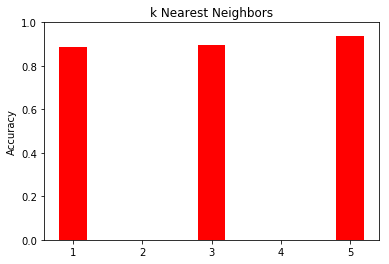

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

'''
https://www.researchgate.net/publication/283568278_NumPy_SciPy_Recipes_for_Data_Science_Computing_Nearest_Neighbors
'''
def k_nearest_neighbors(X, k, x_new):
    argMinSorted = np.argsort(np.sum((X-x_new)**2,axis=1),axis=0)
    return argMinSorted[:k]

trainDataPath = 'data2-train.dat'
testDataPath = 'data2-test.dat'
trainData = np.loadtxt(trainDataPath, dtype=float, delimiter=' ')
testData = np.loadtxt(testDataPath, dtype=float, delimiter=' ')

X = trainData[:, :2]
Y = trainData[:,2]

X_Test = testData[:, :2]
Y_Test = testData[:,2]

K = [1,3,5]
accuracies = []

for k in K:
    start = timeit.default_timer()
    predictions = []
    for x_T in X_Test:
        kNearestNeighbors = k_nearest_neighbors(X, k, x_T)
        predictions.append(1. if np.sum(Y[kNearestNeighbors],axis=0)>0 else -1.)

    accuracy = np.sum(
        np.array([1. if pred == Y_Test[i] else 0. for i, pred in enumerate(predictions)]), axis=0) / float(
        len(Y_Test))
    stop = timeit.default_timer()
    accuracies.append(accuracy)
    print("k: %d  accuracy: %f  runtime: %f" % (k,accuracy,stop - start))

plt.bar(K, accuracies, width=0.4, color='r')
plt.ylabel('Accuracy')
plt.title('k Nearest Neighbors')
plt.ylim(0,1.)
plt.show()

### task 2.5 computing a kD-tree

('using alternate + median\ntime elapsed for finding 1 nearest neighbour of all points in data: ', 0.960604190826416)
('using variance + median\ntime elapsed for finding 1 nearest neighbour of all points in data: ', 1.0936739444732666)


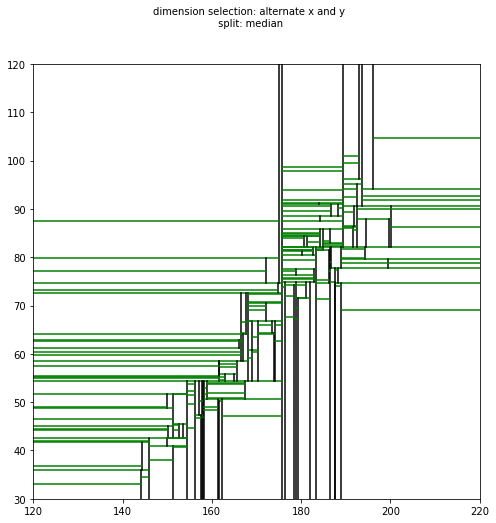

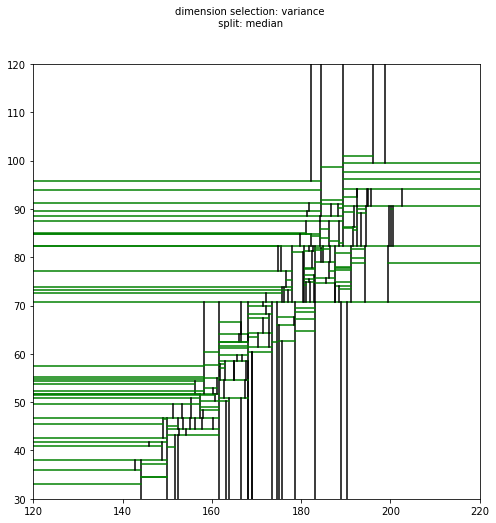

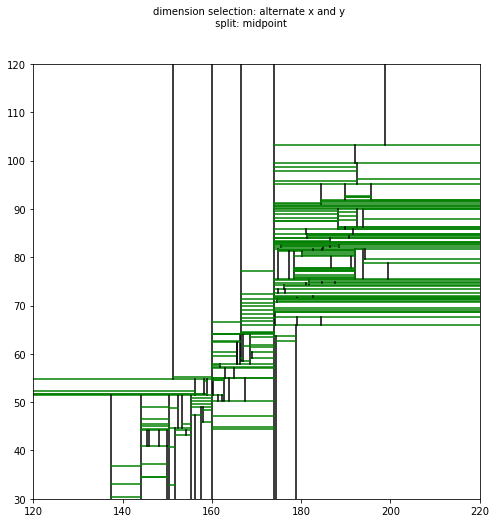

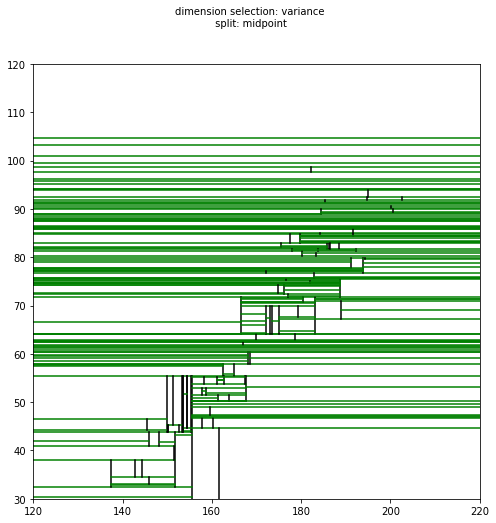

In [3]:
'''
Created on 12 Dec 2017

@author: seyit
'''
import numpy as np
import scipy as sp
import time 
from scipy import spatial
import math
import matplotlib.pyplot as plt
from enum import Enum
import os
from numpy.linalg import norm

np.set_printoptions(precision=1)
points = np.genfromtxt('data2-train.dat',
                  dtype=float,
                  comments='#',
                  delimiter=None)

fig = plt.figure(figsize=(8,8))
fig.suptitle('dimension selection: alternate x and y\n split: median', fontsize=10)
fig2 = plt.figure(figsize=(8,8))
fig2.suptitle('dimension selection: variance\n split: median', fontsize=10)
fig3 = plt.figure(figsize=(8,8))
fig3.suptitle('dimension selection: alternate x and y\n split: midpoint', fontsize=10)
fig4 = plt.figure(figsize=(8,8))
fig4.suptitle('dimension selection: variance\n split: midpoint', fontsize=10)
ax = fig.add_subplot(111)
axx = fig2.add_subplot(111)
bx = fig3.add_subplot(111)
bxx = fig4.add_subplot(111)

class NodeType(Enum):
    LEFT = 0
    RIGHT = 1
class DimensionSelection(Enum):    
    ALTERNATE = 0
    VARIANCE = 1
class SplitType(Enum):
    MIDPOINT = 0
    MEDIAN = 1

class Node:
    def __init__(self, point=None, left=None, right=None, depth=None, axis=None, parent=None, nodetype = None):
        self.point = point
        self.left = left
        self.right = right
        self.depth = depth
        self.axis = axis
        self.parent = parent
        self.nodetype = nodetype
'''an auxiliary function for counting the nodes of given binary tree'''        
def CountNodes(tree, count):
    count = 1
    if tree.left != None:
        count += CountNodes(tree.left, count)
    if tree.right != None:
        count += CountNodes(tree.right, count)
    return count

'''function for computing a kd-tree for k=2. 
it allows for four different means of construction regarding the separating dimension
and split point selections'''
def BuildKDTree(node, points, depth, parent, nodetype, dim, sp):
    if dim == DimensionSelection.ALTERNATE:
        axis = depth % 2
    else:
        axis = 0 if np.var(points, 0)[0] > np.var(points, 0)[1] else 1
    if sp == SplitType.MEDIAN: #sort given points then get the one in the middle
        points = points[points[:,axis].argsort()] 
        index = int(math.floor(points.shape[0]/2))
    else:
        index = int(math.floor(points.shape[0]/2)) #find the mid point
    node = Node(point = points[index], depth=depth, axis = axis, parent = parent, nodetype=nodetype)
    if(points.size > 3):
        node.right = BuildKDTree(node.right, points[:index], depth=depth+1, parent = node, nodetype=NodeType.LEFT, dim = dim, sp = sp)
        node.left = BuildKDTree(node.left, points[index:], depth=depth+1, parent = node, nodetype=NodeType.RIGHT, dim = dim, sp = sp)
        return node
    else:
        return None
    
ax.set_xlim((120, 220))
ax.set_ylim((30, 120))
axx.set_xlim((120, 220))
axx.set_ylim((30, 120))
bx.set_xlim((120, 220))
bx.set_ylim((30, 120))
bxx.set_xlim((120, 220))
bxx.set_ylim((30, 120))

'''auxiliary function for plotting a kd-tree'''
def ReverseAxis(axis):
    return int(math.fabs(axis - 1))

'''function for searching a kd-tree for a parent node with the given axis'''
def SearchParent(node, axis): 
    search = node
    while search.parent != None:
        if search.parent.axis == axis:
            return search.parent
        else:
            search = search.parent 
    
class Line:
    def __init__(self, pointA=None, pointB = None, axis = None):
        self.pointA = pointA
        self.pointB = pointB
        self.axis = axis
        
'''auxiliary function used for plotting a kd-tree. 
get the distance of a point to a line'''        
def GetDistance(point, line):
    point = [point[0], point[1]]
    return norm(np.cross(line.pointB-line.pointA, line.pointA-np.array(point)))/norm(line.pointB-line.pointA)

'''auxiliary function used for plotting a kd-tree. 
get the end point in a line along the given axis obeying the given constraint '''
def GetEndPoint(line, axis, constraint):
    if constraint == 'greater':
        if line.pointA[axis] > line.pointB[axis]:
            return line.pointA[axis] 
        else:
            return line.pointB[axis] 
    else:
        if line.pointA[axis] < line.pointB[axis]:
            return line.pointA[axis] 
        else:
            return line.pointB[axis] 
        
'''auxiliary function used for plotting a kd-tree.
a naive method of finding the end points of a line that goes through the given point
and does not intersect with the previously drawn lines whose axes are the opposite of the line to be drawn'''
def SearchLines(lines, axis, constraint, point):
    match = [line for line in lines if line.axis == axis]
    if constraint =='greater':
        if match == []:
            if axis == 0:
                return 220
            else:
                return 120
        else:
            d = 9999
            if axis == 1:
                hy = 120
                for line in match:
                    if line.pointB[1] >= point[1] and GetEndPoint(line, 0, 'greater') >= point[0]: 
                        if point[0] > GetEndPoint(line, 0, 'less'):
                            d_compare = GetDistance(point, line)
                            if d_compare <= d:
                                hy = line.pointA[1]
                                d = d_compare
                return hy
            else:
                hx = 220
                for line in match:
                    if line.pointA[0] >= point[0] and GetEndPoint(line, 1, 'greater') >= point[1]:
                        if point[1] > GetEndPoint(line, 1, 'less'):
                            d_compare = GetDistance(point, line)
                            if d_compare <= d:
                                hx = line.pointA[0]
                                d = d_compare
                return hx
    else:
        if match == []:
            if axis == 0:
                return 0
            else:
                return 0
        else:
            d = 9999
            if axis == 1:
                ly = 0
                for line in match:
                    if line.pointA[1] < point[1] and GetEndPoint(line, 0, 'greater') > point[0]:
                        if point[0] > GetEndPoint(line, 0, 'less'):
                            d_compare = GetDistance(point, line)
                            if d_compare <= d:
                                ly = line.pointA[1]
                                d = d_compare
                return ly
            else:
                lx = 0
                for line in match:
                    if line.pointA[0] < point[0] and GetEndPoint(line, 1, 'greater') > point[1]:
                        if point[1] > GetEndPoint(line, 1, 'less'):
                            d_compare = GetDistance(point, line)
                            if d_compare <= d:
                                lx = line.pointA[0]
                                d = d_compare
                return lx    

'''recursive function for plotting a kd-tree with k = 2. '''    
def PlotKDTree(node, lines, ax):
    if node.parent == None:
        if node.axis == 0:
            ax.plot([node.point[0], node.point[0]], [0, 120], color='black')
            lines.append(Line(pointA=np.array([node.point[0], 0]), pointB=np.array([node.point[0], 120]), axis = node.axis))
        else:
            ax.plot([0, 220], [node.point[1], node.point[1]], color='green')
            lines.append(Line(pointA=np.array([0, node.point[1]]), pointB=np.array([220, node.point[1]]), axis = node.axis))   
    else:
        if node.axis == 0: #axis == x
            ly = SearchLines(lines, ReverseAxis(node.axis), constraint = 'less', #get the lowest y 
                                 point = node.point)
            hy = SearchLines(lines, ReverseAxis(node.axis), constraint = 'greater', #get the highest y
                                 point = node.point)
            ax.plot([node.point[0], node.point[0]], [ly, hy], color='black')
            lines.append(Line(pointA=np.array([node.point[0], ly]), pointB=np.array([node.point[0], hy]), axis = node.axis))
        else:
            lx = SearchLines(lines, ReverseAxis(node.axis), constraint = 'less', #get the lowest x
                                 point = node.point)
            hx = SearchLines(lines, ReverseAxis(node.axis), constraint = 'greater', #get the highest x
                                 point = node.point)
            ax.plot([lx, hx], [node.point[1], node.point[1]], color='green')
            lines.append(Line(pointA=np.array([lx, node.point[1]]), pointB=np.array([hx, node.point[1]]), axis = node.axis))
    if node.left != None:
        PlotKDTree(node.left, lines, ax)  
    if node.right != None:
        PlotKDTree(node.right, lines, ax)
        
def SearchNearestNeighbour(query, node, ref_point, ref_d):
    p = [node.point[0], node.point[1]]
    ref_point = [ref_point[0], ref_point[1]]
    if node.right == None and node.left == None:
        new_d = spatial.distance.euclidean(query, p)
        if new_d < ref_d:
            ref_d = new_d
            ref_point = p
    else:
        if query[node.axis] <= node.point[node.axis]:
            go = 'left'
        else:
            go = 'right'
        if go == 'left':
            if query[node.axis] - ref_d <= node.point[node.axis]:
                SearchNearestNeighbour(query, node.left, ref_point, ref_d)
            if query[node.axis] + ref_d > node.point[node.axis]:
                SearchNearestNeighbour(query, node.right, ref_point, ref_d)
        else:
            if query[node.axis] + ref_d > node.point[node.axis]:
                SearchNearestNeighbour(query, node.right, ref_point, ref_d)
            if query[node.axis] - ref_d <= node.point[node.axis]:
                SearchNearestNeighbour(query, node.left, ref_point, ref_d)    
            
rootAlternateMED = Node() 
rootVarianceMED = Node()
rootAlternateMID = Node()
rootVarianceMID = Node()     
rootAlternateMED = BuildKDTree(rootAlternateMED, points, depth = 0, parent = None, nodetype = None, 
                   dim = DimensionSelection.ALTERNATE, sp = SplitType.MEDIAN)
rootVarianceMED = BuildKDTree(rootVarianceMED, points, depth = 0, parent = None, nodetype = None, 
                   dim = DimensionSelection.VARIANCE, sp = SplitType.MEDIAN)
rootAlternateMID = BuildKDTree(rootAlternateMID, points, depth = 0, parent = None, nodetype = None, 
                   dim = DimensionSelection.ALTERNATE, sp = SplitType.MIDPOINT)
rootVarianceMID = BuildKDTree(rootVarianceMID, points, depth = 0, parent = None, nodetype = None, 
                   dim = DimensionSelection.VARIANCE, sp = SplitType.MIDPOINT)
    
PlotKDTree(rootAlternateMED, lines = [], ax = ax)
PlotKDTree(rootVarianceMED, lines = [], ax = axx)
PlotKDTree(rootAlternateMID, lines = [], ax = bx)
PlotKDTree(rootVarianceMID, lines = [], ax = bxx)

start = time.time()
for point in points:
    point = [point[0], point[1]]
    SearchNearestNeighbour(point, rootAlternateMED, rootAlternateMED.point, 9999)
end = time.time()
print('using alternate + median\ntime elapsed for finding 1 nearest neighbour of all points in data: ', end - start)
start = time.time()
for point in points:
    point = [point[0], point[1]]
    SearchNearestNeighbour(point, rootVarianceMED, rootVarianceMED.point, 9999)
end = time.time()
print('using variance + median\ntime elapsed for finding 1 nearest neighbour of all points in data: ', end - start)
plt.show()
